## Computer Vision - Assignment 2

## 1.1

In [2]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [3]:
# Defining the dimensions of checkerboard
CHECKERBOARD = (7,7)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [4]:
# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = [] 

In [5]:
# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

In [6]:
source_folder = "images"
extension = "*.jpg" 

In [7]:
# Extracting path of individual image stored in a given directory
files = glob.glob(os.path.join(source_folder, extension))
ctr = 1

for fname in files:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corner = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    if ret == True:
        print("Corners recognised for image no: ", ctr)
        objpoints.append(objp)
        corners = cv2.cornerSubPix(gray, corner, (11,11),(-1,-1), criteria)
        imgpoints.append(corners)

    ctr+=1



Corners recognised for image no:  1
Corners recognised for image no:  2
Corners recognised for image no:  3
Corners recognised for image no:  4
Corners recognised for image no:  5
Corners recognised for image no:  6
Corners recognised for image no:  7
Corners recognised for image no:  8
Corners recognised for image no:  9
Corners recognised for image no:  10
Corners recognised for image no:  11
Corners recognised for image no:  12
Corners recognised for image no:  13
Corners recognised for image no:  14
Corners recognised for image no:  15
Corners recognised for image no:  16
Corners recognised for image no:  17
Corners recognised for image no:  18
Corners recognised for image no:  19
Corners recognised for image no:  20
Corners recognised for image no:  21
Corners recognised for image no:  22
Corners recognised for image no:  23
Corners recognised for image no:  24
Corners recognised for image no:  25


In [8]:
# Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


In [9]:
# Print intrinsic parameters and error estimates
print("Camera matrix: \n", mtx)
print("Focal length along X-axis: ", mtx[0, 0], " ± ", ret)
print("Focal length along Y-axis: ", mtx[1, 1], " ± ", ret)
print("Skew: ", mtx[0, 1], " ± ", ret)
print("Principal point: ","(", mtx[0, 2], ", ", mtx[1, 2], ")", " ± ","(", ret, ", ", ret, ")")

Camera matrix: 
 [[4.16153522e+03 0.00000000e+00 1.99920985e+03]
 [0.00000000e+00 4.21746421e+03 2.25792225e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Focal length along X-axis:  4161.535215263236  ±  3.8413733186345613
Focal length along Y-axis:  4217.464212532699  ±  3.8413733186345613
Skew:  0.0  ±  3.8413733186345613
Principal point:  ( 1999.2098516139556 ,  2257.9222513969326 )  ±  ( 3.8413733186345613 ,  3.8413733186345613 )


## 1.2

In [14]:
image_no = 1
files = glob.glob(os.path.join(source_folder, extension))
for fname in files:
    img = cv2.imread(fname)
    # Detect the corners of the chessboard in the image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (7,7), None)

    # Estimate the extrinsic camera parameters
    ret, rvec, tvec = cv2.solvePnP(objp, corners, mtx, dist)

    # Convert the rotation vector to a rotation matrix
    R, _ = cv2.Rodrigues(rvec)

    # Print the rotation matrix and translation vector
    print('Rotation matrix for image no', image_no, ': ')
    print(R)
    print('Translation vector for image no', image_no, ': ')
    print(tvec)
    print()
    image_no+=1

Rotation matrix for image no  1 : 
[[-0.07102174 -0.92083435  0.38343188]
 [ 0.9786492   0.01000284  0.20529417]
 [-0.19287733  0.38982565  0.90046338]]
Translation vector for image no  1 : 
[[ 1.8134131 ]
 [-1.05169211]
 [20.49358673]]
Rotation matrix for image no  2 : 
[[ 9.89009039e-01 -1.47855058e-01 -4.54478648e-05]
 [ 1.45882437e-01  9.75763952e-01  1.63104336e-01]
 [-2.40714547e-02 -1.61318293e-01  9.86608825e-01]]
Translation vector for image no  2 : 
[[-4.35156273]
 [-0.82093819]
 [21.92070813]]
Rotation matrix for image no  3 : 
[[ 0.99842792 -0.03378052 -0.04472764]
 [ 0.02364548  0.9773472  -0.21031722]
 [ 0.05081906  0.20892898  0.97660949]]
Translation vector for image no  3 : 
[[-3.88361376]
 [-1.00949305]
 [20.29191978]]
Rotation matrix for image no  4 : 
[[ 0.00955223 -0.74671175  0.66507918]
 [ 0.99927689 -0.01735086 -0.03383268]
 [ 0.03680295  0.66492143  0.74600605]]
Translation vector for image no  4 : 
[[ 1.90246356]
 [-1.09932006]
 [16.19225068]]
Rotation matrix 

## 1.3


#### Radial Distortion Coefficients

In [10]:
# Print out radial distortion coefficients
print("Radial distortion coefficients: ", dist)

Radial distortion coefficients:  [[ 0.1183011   0.16991605 -0.04021993  0.00572481 -0.59606313]]


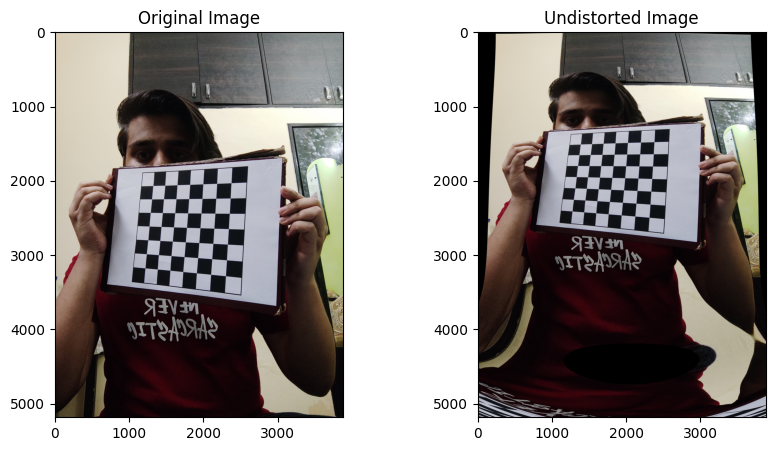

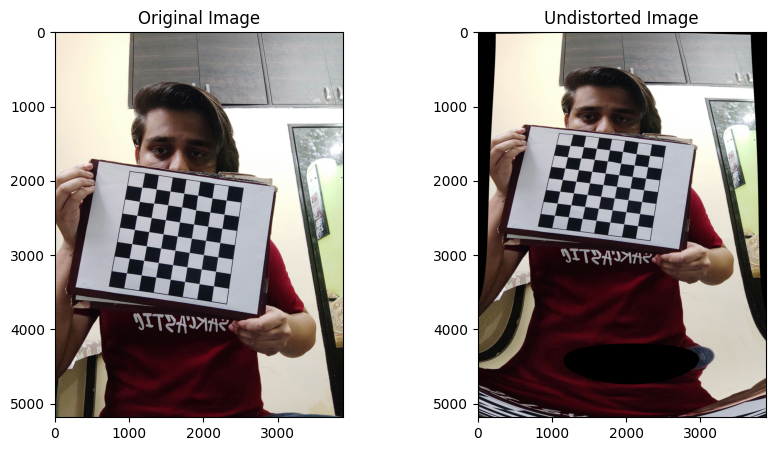

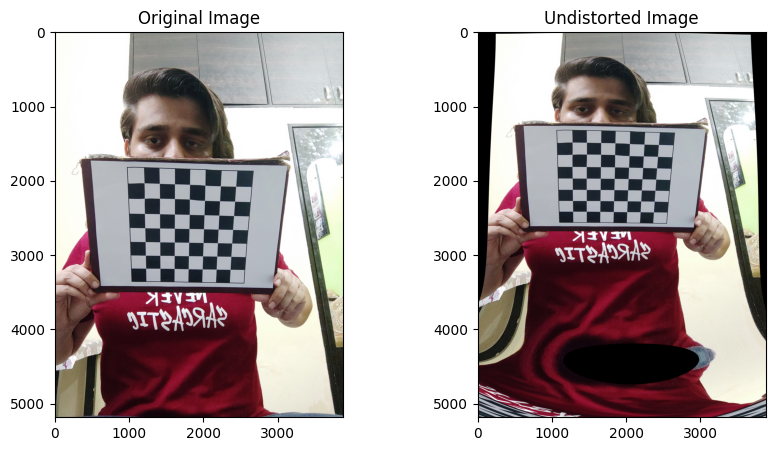

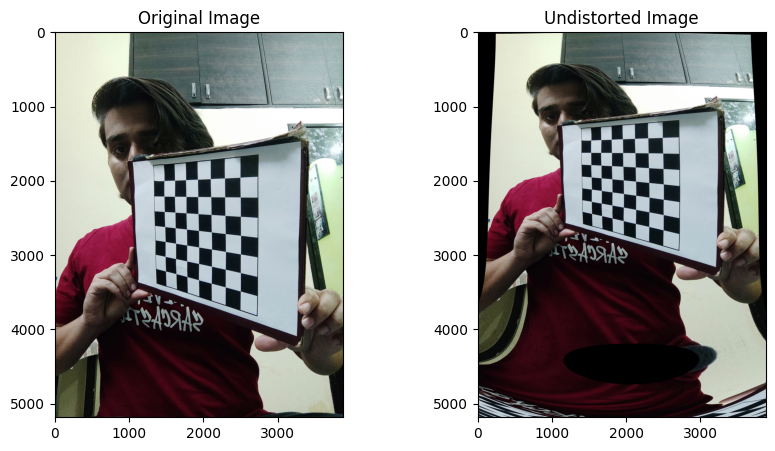

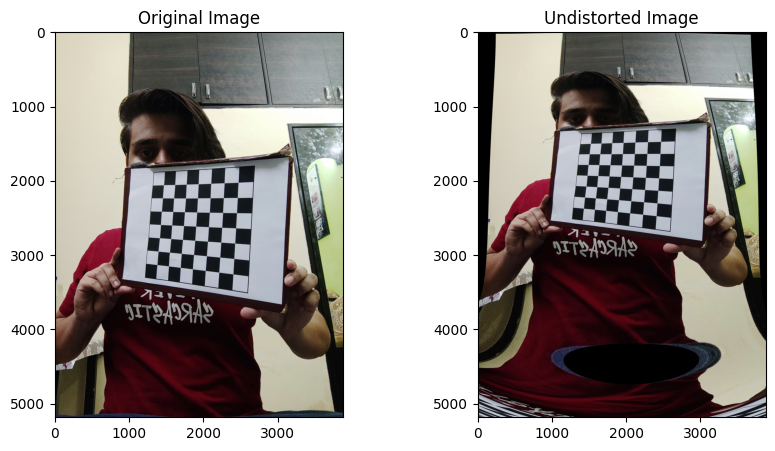

In [11]:
image_no = 1
files = glob.glob(os.path.join(source_folder, extension))
for fname in files:
    if (image_no >= 6):
        break
    # Load raw image
    img_raw = cv2.imread(fname)

    # # Undistort image
    # img_undistorted = cv2.undistort(img_raw, mtx, dist, cv2.COLOR_BGR2RGB)
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, img_raw.shape[1::-1], 1, img_raw.shape[1::-1])

    # Undistort the image using cv2.undistort()
    undistorted_img = cv2.undistort(img_raw, mtx, dist, cv2.COLOR_BGR2RGB, new_camera_matrix)
    
    img_raw = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
    undistorted_img = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img_raw)
    ax[0].set_title("Original Image")
    ax[1].imshow(undistorted_img)
    ax[1].set_title("Undistorted Image")
    plt.show()
    image_no+=1
    

## 1.4

### Reprojection Errors

In [17]:
errors = []
for i in range (len(files)):
    project_points, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], project_points, cv2.NORM_L2) / len(project_points)
    errors.append(error)

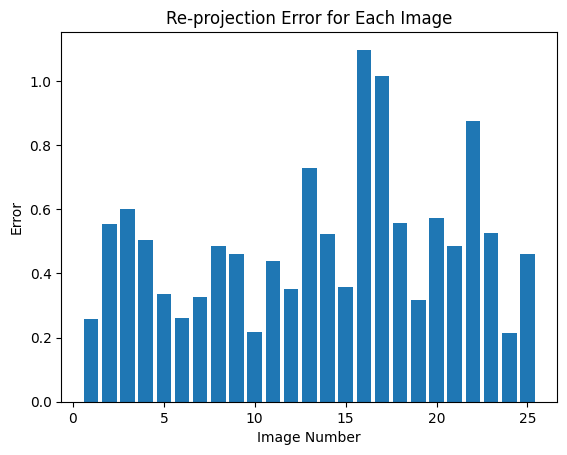

Mean re-projection error: 0.50 pixels
Standard deviation of re-projection error: 0.22 pixels


In [18]:
# Plot the re-projection error for each image
plt.bar(range(1,len(errors)+1), errors)
plt.title("Re-projection Error for Each Image")
plt.xlabel("Image Number")
plt.ylabel("Error")
plt.show()

# Report the mean and standard deviation of the re-projection error
mean_error = np.mean(errors)
std_error = np.std(errors)
print("Mean re-projection error: {:.2f} pixels".format(mean_error))
print("Standard deviation of re-projection error: {:.2f} pixels".format(std_error))

## 1.5

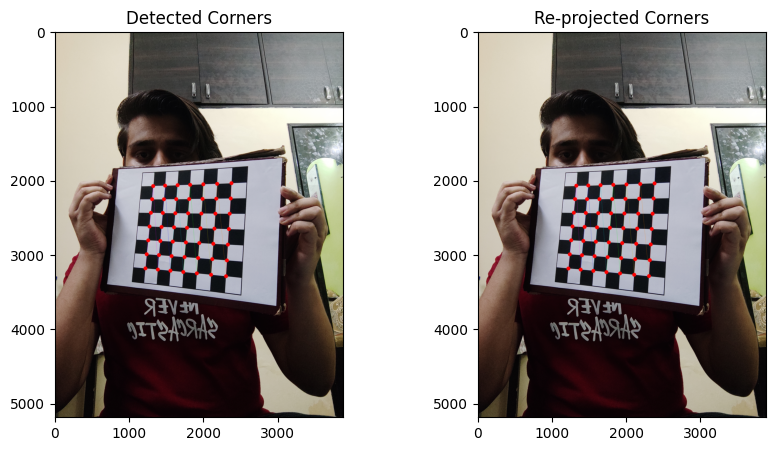

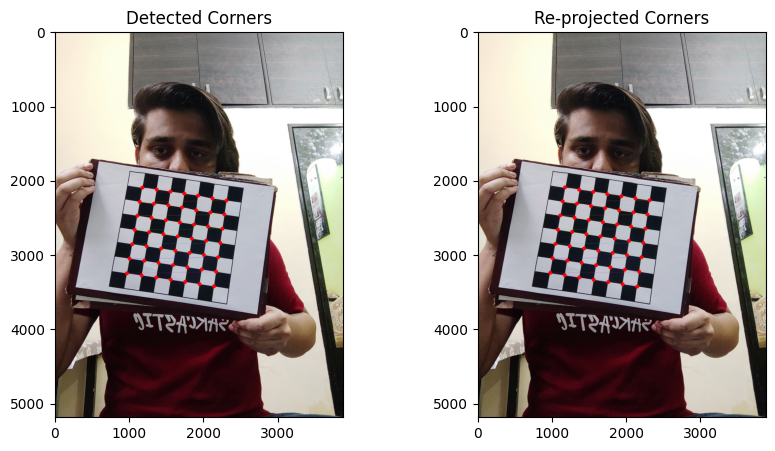

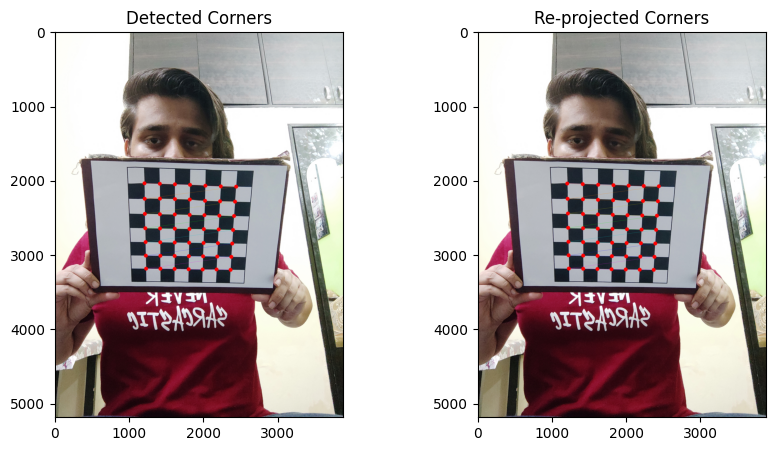

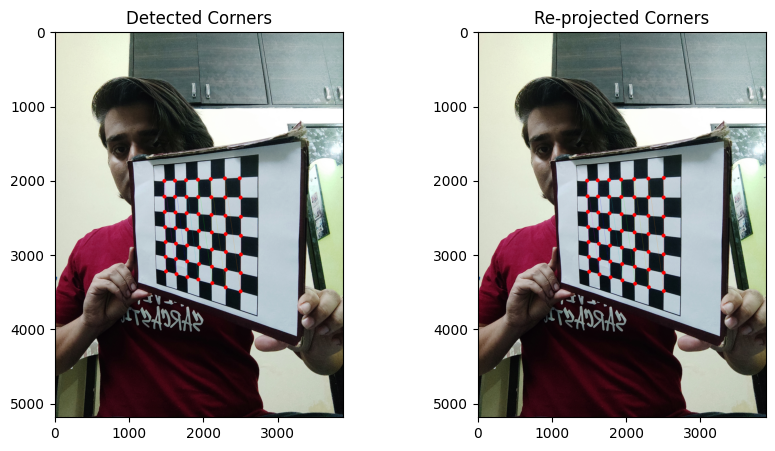

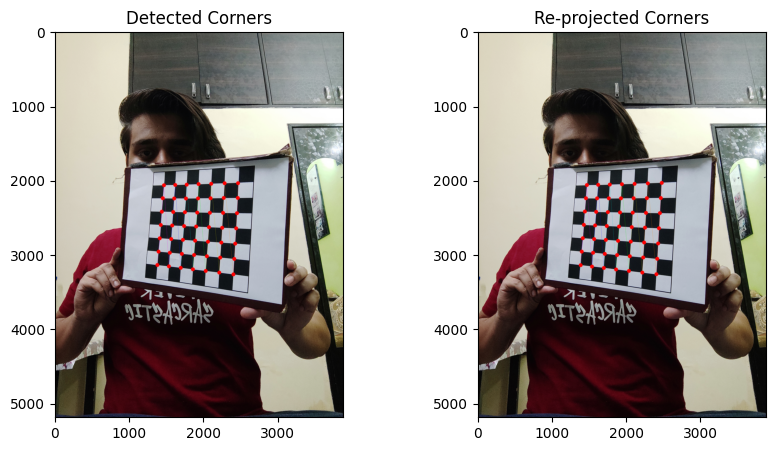

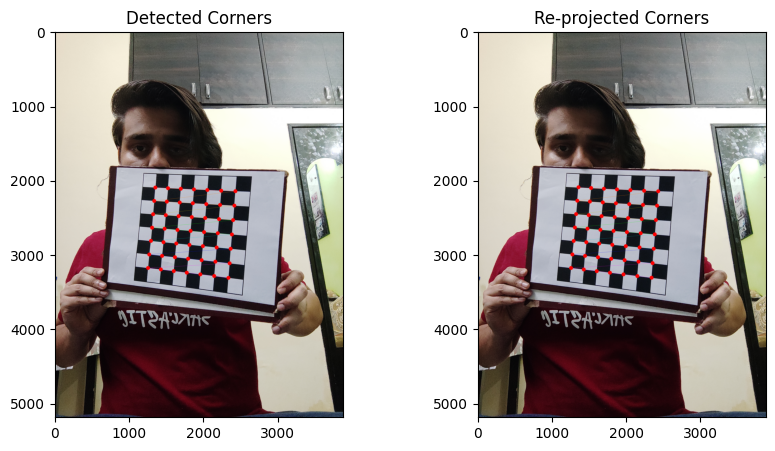

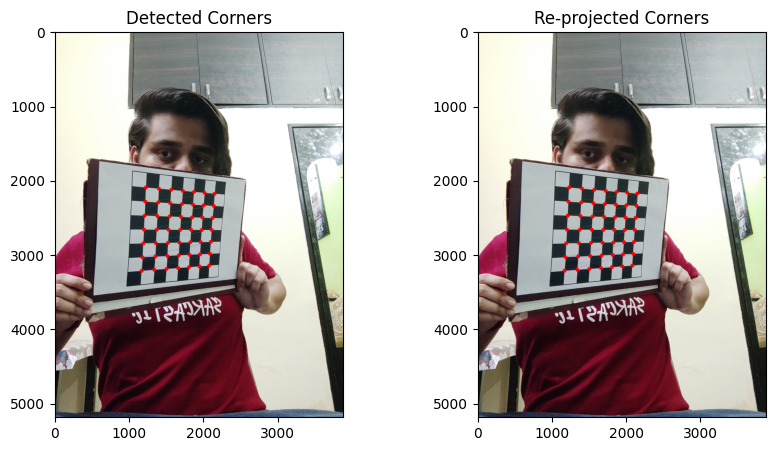

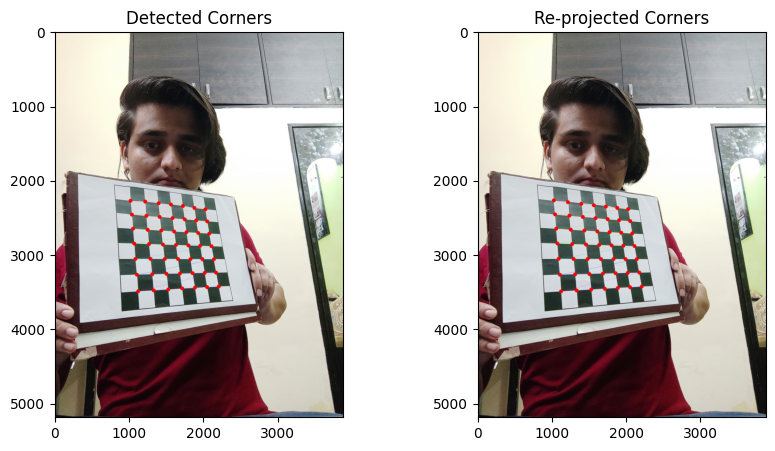

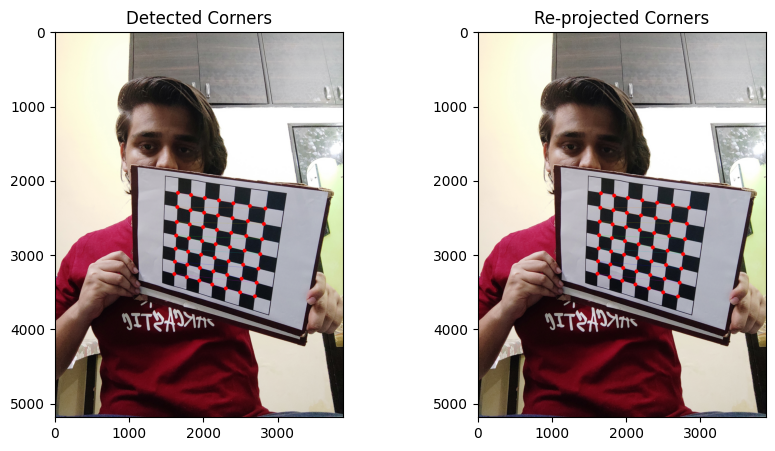

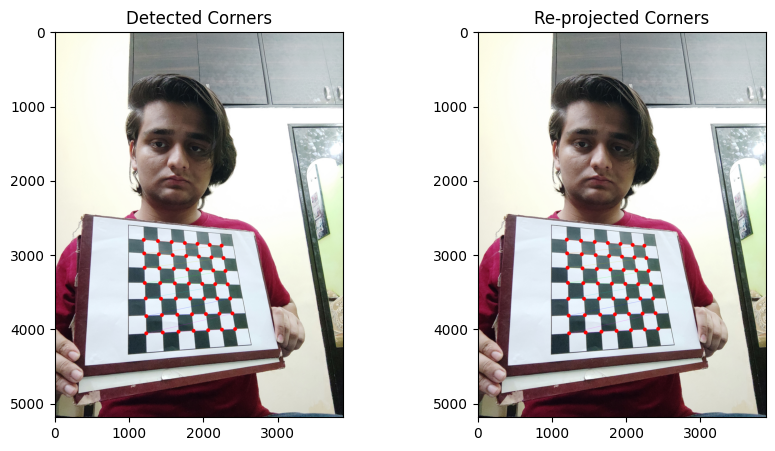

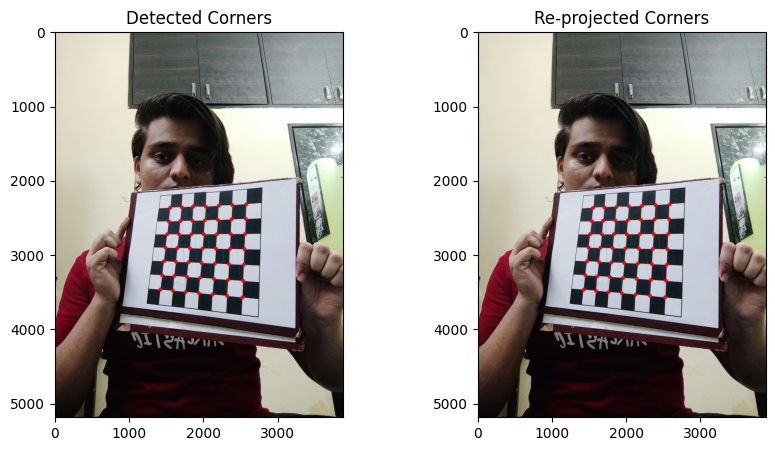

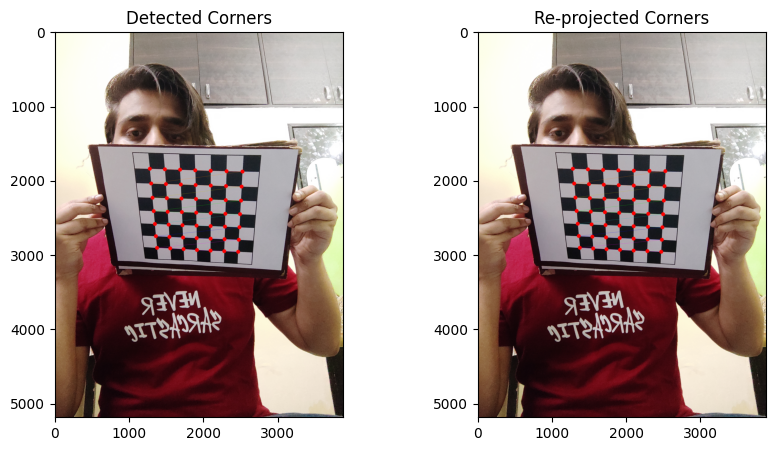

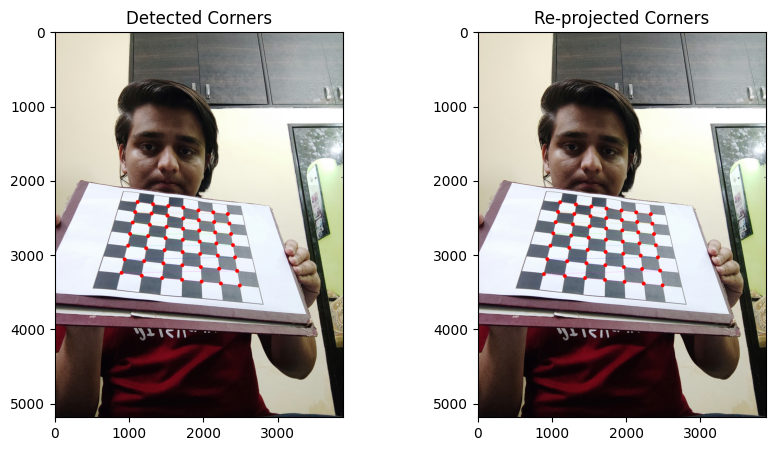

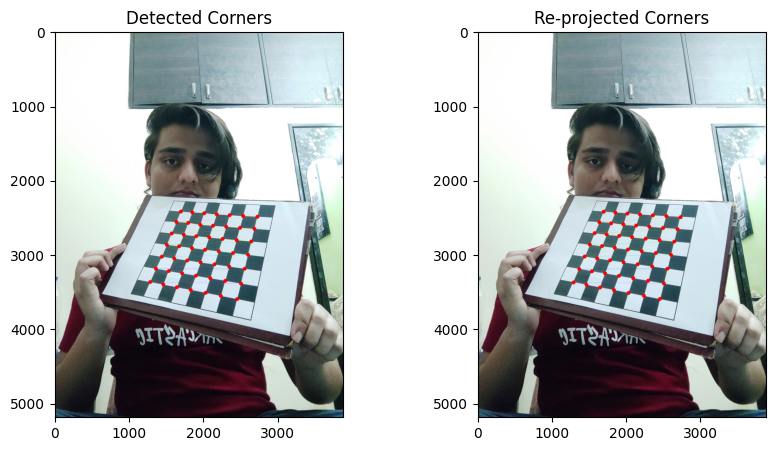

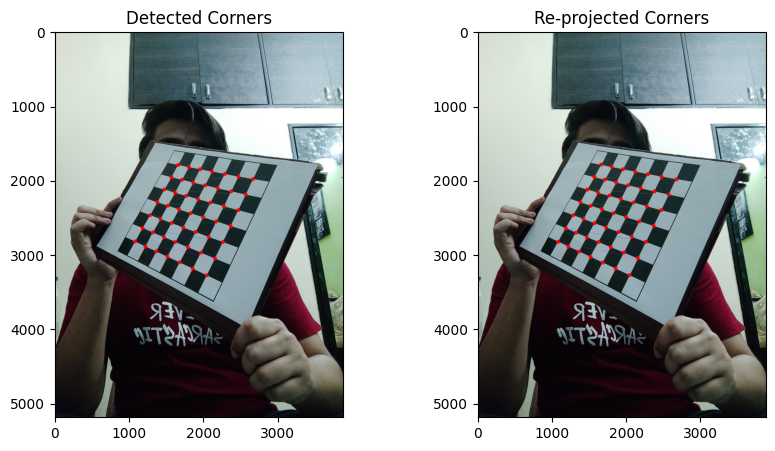

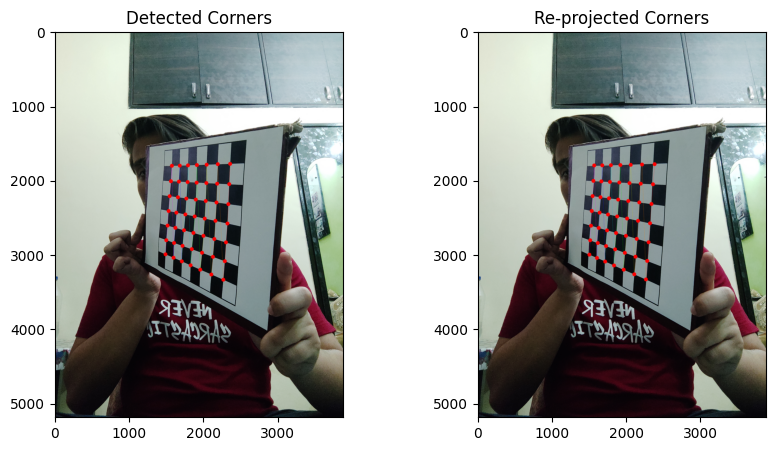

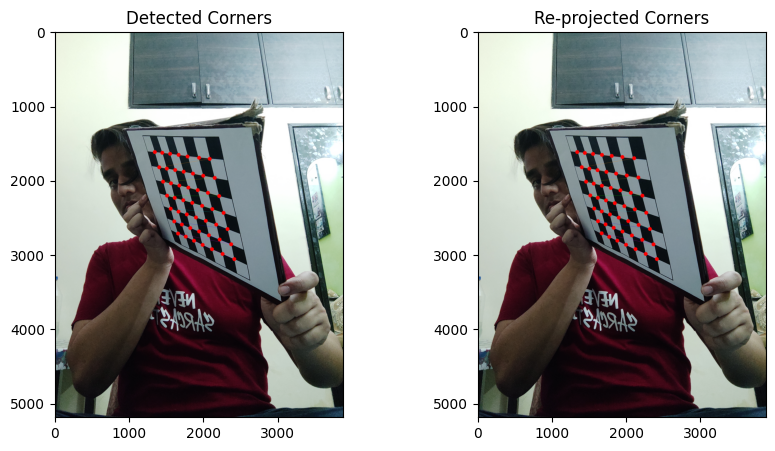

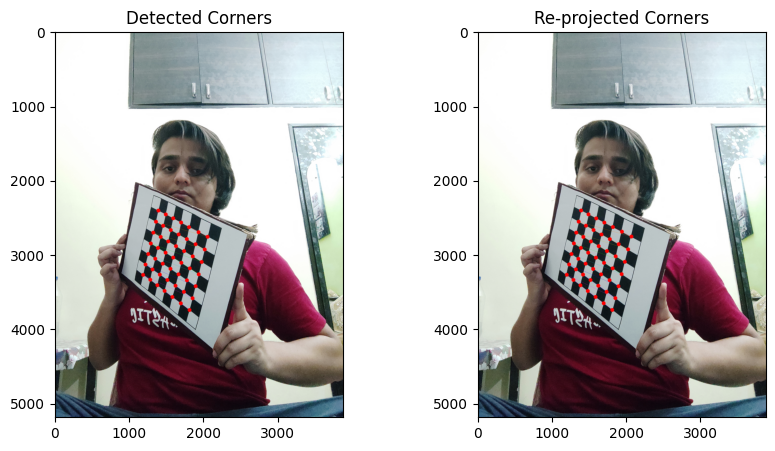

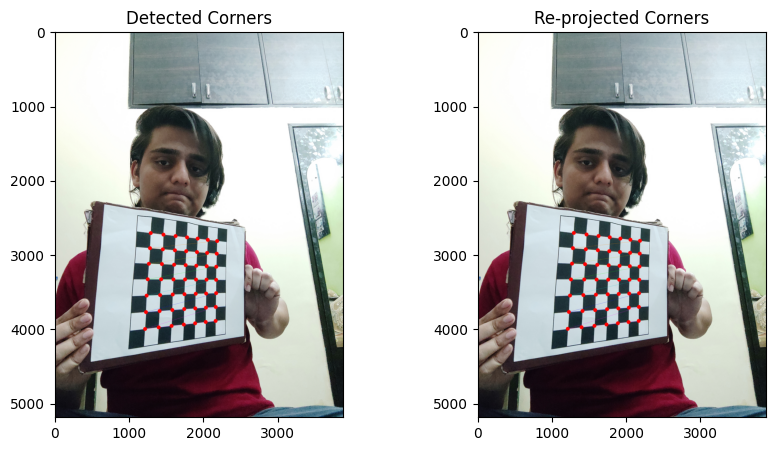

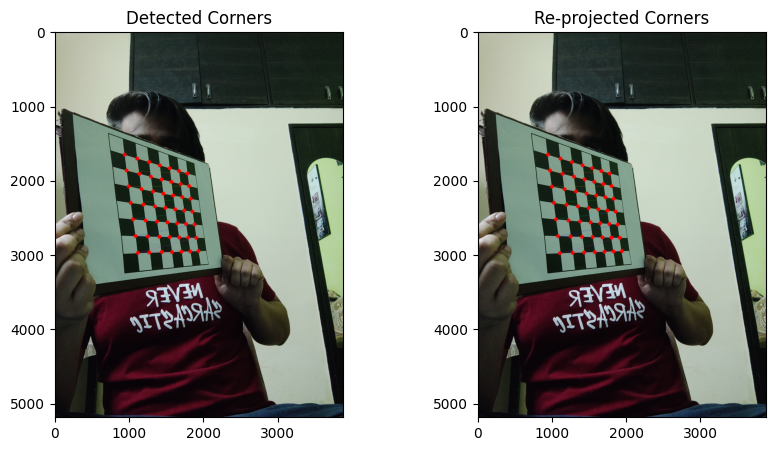

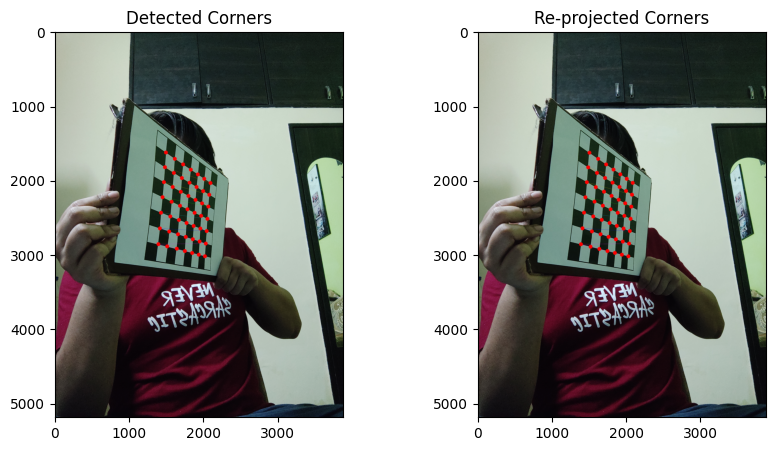

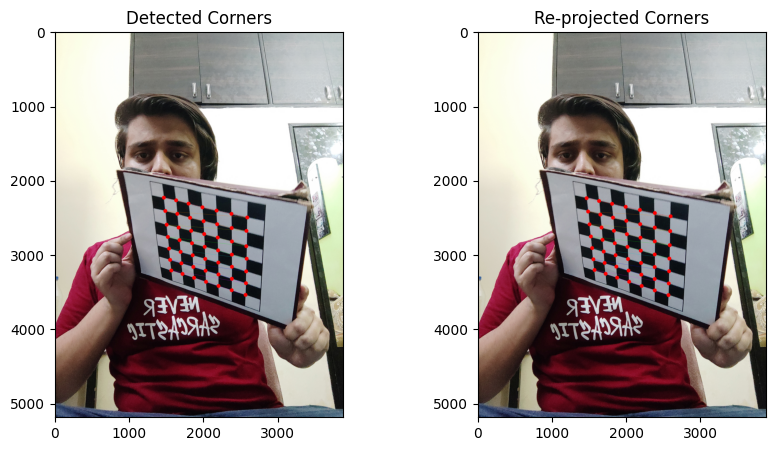

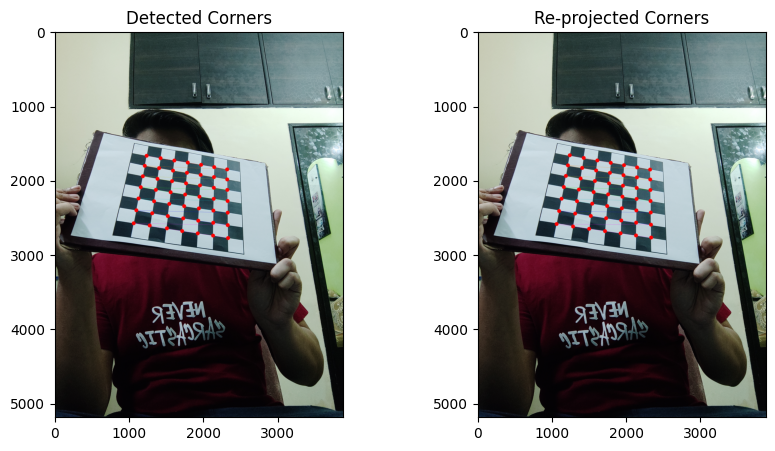

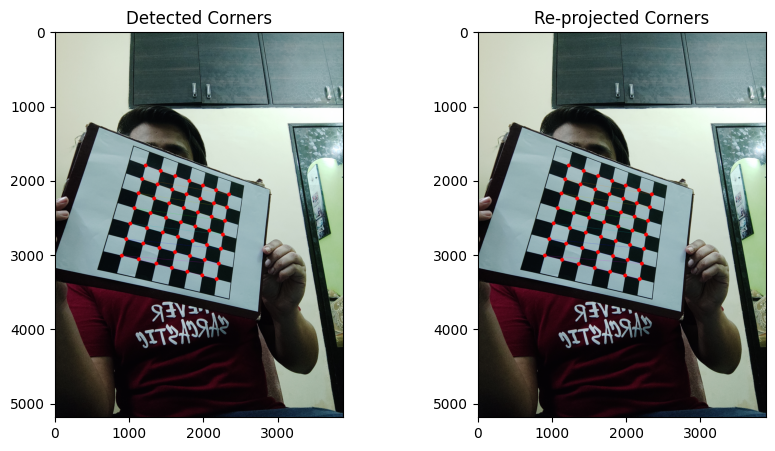

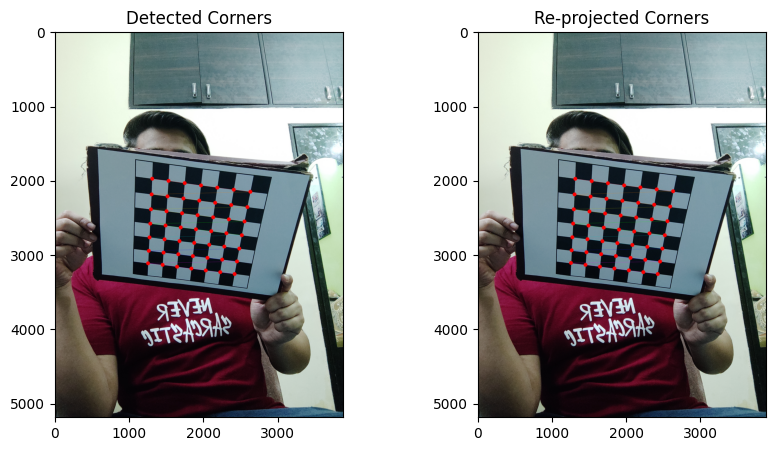

In [19]:
# Plot corners detected in the image and the re-projected corners for all images
ctr = 0
for i, file in enumerate(files):
    
    # Load image
    img = cv2.imread(file)

    # Find corners in the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)
    # print(len(corners))
    
    # Draw corners detected in the image
    image_corners = img.copy()
    image_corners = cv2.drawChessboardCorners(image_corners, CHECKERBOARD, corners, ret)
    
    color = (0, 0, 255)
    for cor in corners:
        radius = 6
        center=tuple(map(int, cor[0]))
        cv2.circle(image_corners, center, radius, color, 40)

    # Re-project corners onto the image
    project_points, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)

    # Draw re-projected corners onto the image
    projected_corners = img.copy()
    projected_corners = cv2.drawChessboardCorners(projected_corners, CHECKERBOARD, project_points, True)
    
    for cor in project_points:
        radius = 6
        center=tuple(map(int, cor[0]))
        cv2.circle(projected_corners, center, radius, color, 40)

    # Plot the two images side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(cv2.cvtColor(image_corners, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Detected Corners")
    ax[1].imshow(cv2.cvtColor(projected_corners, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Re-projected Corners")
    plt.show()
    ctr+=1

## 1.6

### Computing the checkerboard plane normals

In [20]:
# Compute the checkerboard plane normals in the camera coordinate frame of reference
plane_normals = []
for i in range(len(objpoints)):
    # Convert the rotation vector to a rotation matrix
    R, _ = cv2.Rodrigues(rvecs[i])

    # Compute the checkerboard plane normal in the camera coordinate frame
    normal = np.dot(R, np.array([0, 0, 1]))
    plane_normals.append(normal)

print("The plane normals for each image are: \n")
print()
for i in range (len(plane_normals)):
    print("For image ", i+1, ": ")
    print(plane_normals[i])
    print()

The plane normals for each image are: 


For image  1 : 
[0.38337926 0.20683334 0.9001335 ]

For image  2 : 
[-8.50578327e-04  1.61832906e-01  9.86817809e-01]

For image  3 : 
[-0.0455157  -0.20992275  0.97665795]

For image  4 : 
[ 0.66591358 -0.0320137   0.74534169]

For image  5 : 
[0.45397502 0.15183171 0.87798281]

For image  6 : 
[0.24094387 0.12715852 0.96217294]

For image  7 : 
[-0.55840051 -0.0419454   0.82851038]

For image  8 : 
[-0.53967705  0.42282239  0.72799033]

For image  9 : 
[ 0.40941383 -0.18497022  0.89340155]

For image  10 : 
[-0.41898367  0.51436868  0.74824966]

For image  11 : 
[0.42717387 0.29256462 0.85552816]

For image  12 : 
[ 0.09726443 -0.38442969  0.91801604]

For image  13 : 
[-0.18352929  0.80575368  0.5630968 ]

For image  14 : 
[0.28348609 0.63921947 0.71486649]

For image  15 : 
[0.46437146 0.4758631  0.74693605]

For image  16 : 
[0.80116396 0.02789188 0.59779458]

For image  17 : 
[ 0.77226278 -0.39142039  0.50040011]

For image  18 : 
[0.67143